# Handwritten Digit Classification in Pytorch

The goal here is to classify hand-drawn images of the numbers 0-9 and build and train a neural network to recognize and predict the correct label for the digit displayed. The dataset we will be using is called the MNIST dataset, and it is a classic in the machine learning community. This dataset is made up of images of handwritten digits, 28x28 pixels in size. Here are some examples of the digits included in the dataset:
![title](MNIST.png)

In this notebook our main focus is to use different utility packages provided within PyTorch (nn, autograd, optim, torchvision, torchtext, etc.) to build and train neural networks. 

## Step1: Import MNIST Dataset  and Preprocess it

In [1]:
from torchvision import transforms
from torchvision.datasets import MNIST
import torch.nn.functional as F

In [2]:
### Data Preprocessing: We need to transform the raw dataset into tensors and normalize them in a fixed range.
### The torchvision package provides a utility called transforms which can be used to combine different 
### transformations together.

transform_tasks = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

The first transformation converts the raw data into tensor variables and the second transformation performs normalization using the below operation:

x_normalized = x-mean / std

The values 0.5 and 0.5 represent the mean and standard deviation for 3 channels: red, green, and blue.

In [3]:
#--------- Load MNIST Dataset and apply transformations ---------#
mnist = MNIST("data", download=True, train=True, transform=transform_tasks)

### DataLoader: 
Iterators which provide the ability to batch, shuffle and load the data in parallel using multiprocessing workers. For the purpose of evaluating our model, we will partition our data into training and validation sets.

In [4]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [5]:
#--------- create training and validation split ---------#
split = int(0.8 * len(mnist))
index_list = list(range(len(mnist)))
train_idx, valid_idx = index_list[:split], index_list[split:]

In [6]:
#--------- create sampler objects using SubsetRandomSampler ---------#
tr_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(valid_idx)

In [7]:
#--------- create iterator objects for train and valid datasets ---------#
trainloader = DataLoader(mnist, batch_size=256, sampler=tr_sampler)
validloader = DataLoader(mnist, batch_size=256, sampler=val_sampler)

## Step2: Defining the Neural Network
The architecture of the neural network refers to elements such as the number of layers in the network, the number of units in each layer, and how the units are connected between layers. In the inline below, add the number of units per layer in global variables. 


In [8]:
import torch.nn.functional as F
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 512)
        self.hidden2 = nn.Linear(512, 256)
        self.hidden3 = nn.Linear(256, 128)
        self.output = nn.Linear(128, 10)
  
    def forward(self, x):
        x = self.hidden1(x)
        x = F.sigmoid(x)
        x = self.hidden2(x)
        x = F.sigmoid(x)
        x = self.hidden3(x)
        x = F.sigmoid(x)
        x = self.output(x)
        return x



In [9]:
model = Model()

### Loss Function and Optimizer
Define the loss function and the optimizer using the nn and optim package:

In [10]:
from torch import optim

In [11]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay= 1e-6, momentum = 0.9, nesterov = True)

## Step3: Training and Testing

In [12]:
import numpy as np

for epoch in range(1, 25): ## Run the model for 10 epochs
    train_loss, valid_loss = [], []
    
    ## training part 
    model.train()
    for data, target in trainloader:
        
        data = data.reshape(-1,28*28)
        optimizer.zero_grad()
        
         ## 1. forward propagation
        output = model(data)
        
        ## 2. loss calculation
        loss = loss_function(output, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        train_loss.append(loss.item())
        
    ## evaluation part 
    model.eval()
    for data, target in validloader:
        
        data = data.reshape(-1,28*28)
        output = model(data)
        loss = loss_function(output, target)
        valid_loss.append(loss.item())
        
    print ("Epoch:", epoch, "Training Loss: ", np.mean(train_loss), "Valid Loss: ", np.mean(valid_loss))
        


/home/radhika/internship/myvenv/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 Training Loss:  2.3044318531421903 Valid Loss:  2.304186521692479
Epoch: 2 Training Loss:  2.301375928077292 Valid Loss:  2.3024412571115698
Epoch: 3 Training Loss:  2.2999199996603297 Valid Loss:  2.2987084693097053
Epoch: 4 Training Loss:  2.2972526220565146 Valid Loss:  2.295880855397975
Epoch: 5 Training Loss:  2.2931166709737574 Valid Loss:  2.2935028786354876
Epoch: 6 Training Loss:  2.2835893643663283 Valid Loss:  2.2753405012982957
Epoch: 7 Training Loss:  2.252014212151791 Valid Loss:  2.2138985623704626
Epoch: 8 Training Loss:  2.0744921825033553 Valid Loss:  1.8851163919935836
Epoch: 9 Training Loss:  1.6785669117531878 Valid Loss:  1.434272804158799
Epoch: 10 Training Loss:  1.264298584867031 Valid Loss:  1.0891657737975424
Epoch: 11 Training Loss:  0.990102784113681 Valid Loss:  0.8629197858749552
Epoch: 12 Training Loss:  0.8340823767667122 Valid Loss:  0.7640079830555205
Epoch: 13 Training Loss:  0.7575869981912856 Valid Loss:  0.6977708885010253
Epoch: 14 Train

## Prediction on test data

In [17]:
dataiter = iter(validloader)
data, labels = dataiter.next()
images = data
data = data.reshape(-1,28*28)
output = model(data)

/home/radhika/internship/myvenv/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [18]:
import torch 
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())

In [19]:
#--------- Test Accuracy ---------#
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, preds))

0.84375


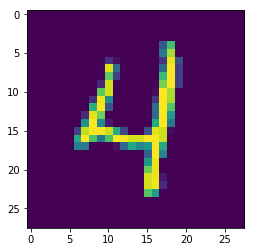

Actual: tensor(4)
Predicted: 4


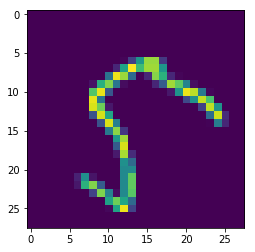

Actual: tensor(5)
Predicted: 5


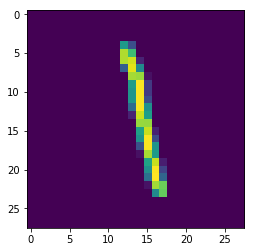

Actual: tensor(1)
Predicted: 1


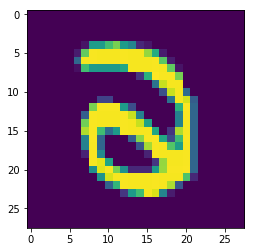

Actual: tensor(2)
Predicted: 5


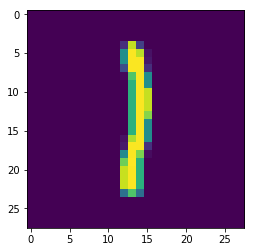

Actual: tensor(1)
Predicted: 1


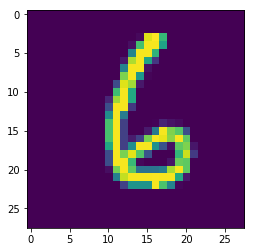

Actual: tensor(6)
Predicted: 6


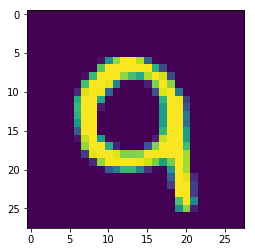

Actual: tensor(9)
Predicted: 9


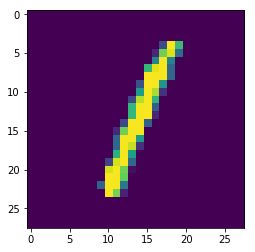

Actual: tensor(1)
Predicted: 1


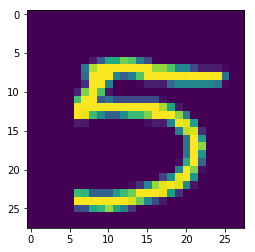

Actual: tensor(5)
Predicted: 5


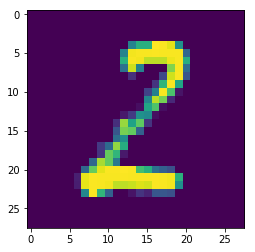

Actual: tensor(2)
Predicted: 2


In [20]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(images[i][0])
    plt.show()
    print ("Actual:", labels[i])
    print ("Predicted:", preds[i])